In [1]:
import pandas as pd
import numpy as np

dt=pd.read_csv('./mint_data - Sheet1.csv',encoding= 'unicode_escape',index_col='Number')
#dt = dt.drop(columns='rarity')

D:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [20]:
dt.head()

,Gender,Background,Face color,Occasions,Eyes,Accs on face,Facial Expressions,Accs on head,Clothes,Little Accs
Number,,,,,,,,,,
1,1,4,1,2,1,4,1,5,0,0
2,1,2,2,2,1,3,2,5,18,2
3,1,3,3,2,1,0,1,5,19,1
4,2,10,5,2,2,0,1,5,10,2
5,1,1,4,1,1,0,1,5,4,0


# New Section

In [21]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              889 non-null    int64
 1   Background          889 non-null    int64
 2   Face color          889 non-null    int64
 3   Occasions           889 non-null    int64
 4   Eyes                889 non-null    int64
 5   Accs on face        889 non-null    int64
 6   Facial Expressions  889 non-null    int64
 7   Accs on head        889 non-null    int64
 8   Clothes             889 non-null    int64
 9   Little Accs         889 non-null    int64
dtypes: int64(10)
memory usage: 76.4 KB


In [22]:
dt.columns

Index(['Gender', 'Background', 'Face color', 'Occasions', 'Eyes',
       'Accs on face', 'Facial Expressions', 'Accs on head', 'Clothes',
       'Little Accs'],
      dtype='object')

In [23]:
traits_count = {}
for col in dt.columns:
  traits_count[col]=dt[col].value_counts().to_dict()

In [24]:
len(dt.Gender.value_counts())
value_count = [len(dt[c].value_counts()) for c in dt.columns]
print(value_count)
print(1./np.array(value_count))

[2, 10, 5, 2, 3, 8, 2, 11, 21, 6]
[0.5        0.1        0.2        0.5        0.33333333 0.125
 0.5        0.09090909 0.04761905 0.16666667]


In [25]:

# data:
# col:features of NFT
# row:one NFT


def jaccard_distance(df):
  all_mean = [] # 存储所有NFT之间的平均距离
  value_count = [len(df[c].value_counts()) for c in df.columns] #求得每个特征的类别数目
  value_count = np.array(value_count)
  weight = 1./value_count
  for i in range(len(df)): #对于每一个NFT
    nft = df.iloc[i].to_numpy() #提取特征
    jaccard_all = [] #存储这个NFT到其他NFT的距离
    for j in range(len(df)): #对于每一个其他（包括自己）的NFT
      other_nft = df.iloc[j].to_numpy() #提取特征
      k = nft==other_nft #找到交集
      k = np.array(k)
      k = k * weight #增加类别权重，某特征类别越多，越不容易相同，相同的时候权重越小
      intersection = k.sum() #得到交集总权重
      union = weight.sum()*2 - intersection #得到并集总权重
      jaccard_index = intersection/union #求得两NFT之间相似度
      jaccard_dis = 1 - jaccard_index #求得两NFT之间差异度
      jaccard_all.append(jaccard_dis) 
    jaccard_all=np.array(jaccard_all)
    mean_distance = jaccard_all.mean() #计算此NFT与其他NFT的平均差异
    all_mean.append(mean_distance) #将平均差异放入数组
  all_mean = np.array(jaccard_all) 
  all_mean = (all_mean - all_mean.min())*100/(all_mean.max()-all_mean.min()) #归一化
  df['rarity'] = all_mean 
    
  
jaccard_distance(dt)



In [26]:
print(dt)

        Gender  Background  Face color  Occasions  Eyes  Accs on face  \
Number                                                                  
1            1           4           1          2     1             4   
2            1           2           2          2     1             3   
3            1           3           3          2     1             0   
4            2          10           5          2     2             0   
5            1           1           4          1     1             0   
...        ...         ...         ...        ...   ...           ...   
884          1           3           4          2     1             4   
885          1           6           3          2     1             0   
886          1           1           1          2     2             0   
887          1           6           1          2     1             0   
888          1           9           1          2     1             0   

        Facial Expressions  Accs on head  Clothes 

In [27]:
avg_rar = dt.copy(deep=True).astype(float)


def avg_rarity(df):
  
  for i in range(len(df)): #对于每一个NFT
    nft = df.iloc[i] #提取特征
    for k,v in traits_count.items():
      # print(v[nft[k]]/float(df.shape[0]))
      avg_rar.iloc[i][k] = float(v[nft[k]])/float(df.shape[0])
 

avg_rarity(dt)
avg_rar['average_rarity'] = avg_rar.iloc[:,0:avg_rar.shape[1]-1].sum(axis=1)/(avg_rar.shape[1]-1)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [28]:
avg_rar['average_rarity']

Number
1      1.9
2      3.8
3      3.6
4      3.9
5      1.8
      ... 
884    3.2
885    4.1
886    2.9
887    3.1
888    3.5
Name: average_rarity, Length: 889, dtype: float64

In [29]:
avg_rar['average_rarity'].value_counts().sort_index()

0.8     1
0.9     1
1.0     1
1.1     1
1.2     4
1.3     5
1.4     3
1.5     7
1.6    12
1.7    19
1.8    13
1.9    21
2.0    20
2.1    15
2.2    27
2.3    10
2.4    24
2.5    16
2.6    25
2.7    29
2.8    47
2.9    29
3.0    44
3.1    49
3.2    47
3.3    57
3.4    47
3.5    40
3.6    52
3.7    41
3.8    37
3.9    32
4.0    28
4.1    26
4.2    13
4.3    13
4.4    13
4.5     6
4.6     5
4.7     3
4.8     1
4.9     3
5.1     1
5.4     1
Name: average_rarity, dtype: int64

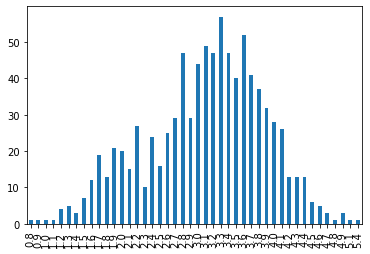

In [30]:
avg_rar['average_rarity'].value_counts().sort_index().plot(kind='bar')

In [31]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [32]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 888
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              889 non-null    int64  
 1   Background          889 non-null    int64  
 2   Face color          889 non-null    int64  
 3   Occasions           889 non-null    int64  
 4   Eyes                889 non-null    int64  
 5   Accs on face        889 non-null    int64  
 6   Facial Expressions  889 non-null    int64  
 7   Accs on head        889 non-null    int64  
 8   Clothes             889 non-null    int64  
 9   Little Accs         889 non-null    int64  
 10  rarity              889 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 83.3 KB


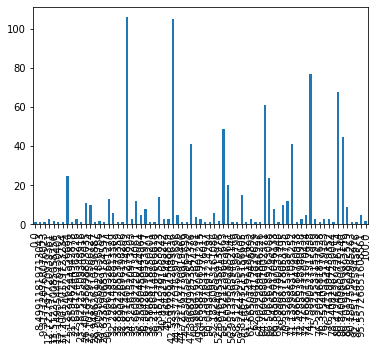

In [33]:
dt['rarity'].value_counts().sort_index().plot(kind='bar')


In [34]:
dt['rarity'].describe()

count    889.000000
mean      55.076727
std       19.313968
min        0.000000
25%       39.315138
50%       55.016212
75%       72.766872
max      100.000000
Name: rarity, dtype: float64

In [35]:
dt['rarity'].value_counts()

33.871405     106
42.529773     105
74.758905      77
80.472463      68
64.760688      61
55.016212      49
80.840009      45
47.396900      41
71.139986      41
21.125246      25
66.506362      24
55.503656      20
59.824643      15
39.315138      14
30.378063      13
35.660922      12
70.352832      12
26.401436      11
27.101976      10
69.899878      10
89.201916       9
66.545650       8
36.304268       8
52.182810       6
32.226148       6
72.766872       5
95.557269       5
36.250805       5
44.333771       5
48.968477       4
61.665075       3
49.486882       3
22.658175       3
34.525615       3
72.478553       3
40.854529       3
75.932553       3
76.741199       3
12.722798       3
76.355405       3
41.466858       3
29.005837       2
100.000000      2
52.684641       2
13.512270       2
17.200170       1
23.382526       1
38.218641       1
9.317121        1
61.166716       1
28.948626       1
69.899878       1
37.586887       1
56.951336       1
90.188755       1
44.721764 

In [ ]:
dt.to_csv('./calculated_rarity_sheet.csv')